#Calories need prediction

## A. Import

In [8]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# import tabulate
# from recsysNN_utils import *
# pd.set_option("display.precision", 1)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## B. Load Data


In [13]:
df = pd.read_csv("/content/drive/MyDrive/machine_learning/food_grading/dataset/obesity.csv", sep=',')

In [14]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [15]:
df.shape

(20758, 18)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [17]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [18]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
df = df[['Gender', 'Age', 'Height', 'Weight', 'CALC', 'NObeyesdad']]

# Data wrangling

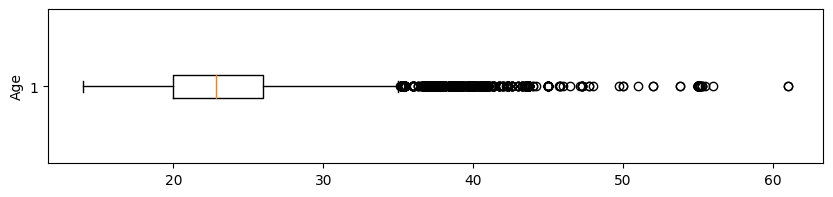

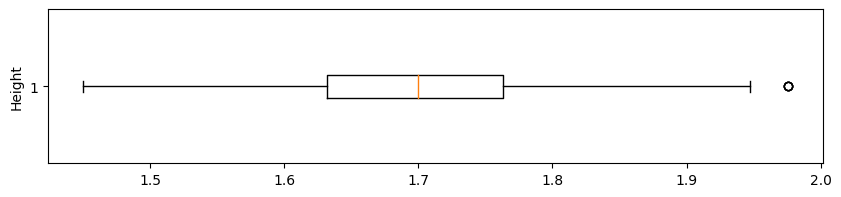

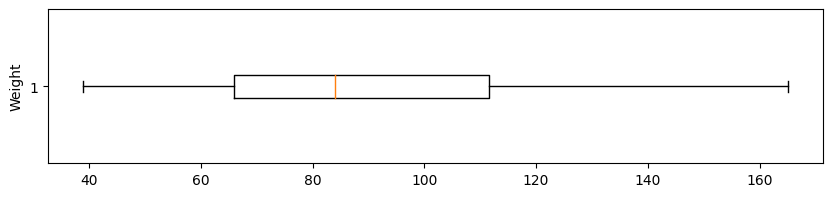

In [20]:
#check outliers
integer_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in integer_features:
    plt.figure(figsize=(10, 2), dpi=100)
    plt.boxplot(df[feature], vert=False)
    plt.ylabel(feature)
    plt.show()

In [21]:
label_encoder = LabelEncoder()
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df.head()

<ipython-input-21-e27cc728de8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CALC'] = label_encoder.fit_transform(df['CALC'])


,Gender,Age,Height,Weight,CALC,NObeyesdad
0,Male,24.443011,1.699998,81.669950,1,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,2,Normal_Weight
2,Female,18.000000,1.711460,50.165754,2,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1,Overweight_Level_II


In [22]:
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.head()

<ipython-input-22-5c8c77f16d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


,Gender,Age,Height,Weight,CALC,NObeyesdad
0,Male,24.443011,1.699998,81.669950,1,6
1,Female,18.000000,1.560000,57.000000,2,1
2,Female,18.000000,1.711460,50.165754,2,0
3,Female,20.952737,1.710730,131.274851,1,4
4,Male,31.641081,1.914186,93.798055,1,6


In [23]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(10)

<ipython-input-23-804a728b0546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])


,Gender,Age,Height,Weight,CALC,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,6
1,0,18.000000,1.560000,57.000000,2,1
2,0,18.000000,1.711460,50.165754,2,0
3,0,20.952737,1.710730,131.274851,1,4
4,1,31.641081,1.914186,93.798055,1,6
5,1,18.128249,1.748524,51.552595,1,0
6,1,29.883021,1.754711,112.725005,1,3
7,1,29.891473,1.750150,118.206565,1,3
8,1,17.000000,1.700000,70.000000,2,5
9,0,26.000000,1.638836,111.275646,1,4


In [24]:
df.tail(10)

,Gender,Age,Height,Weight,CALC,NObeyesdad
20748,1,21.000000,1.757958,89.048151,2,6
20749,0,25.783865,1.646390,104.835346,1,4
20750,1,18.827008,1.753321,80.000000,2,5
20751,0,21.030909,1.605495,133.466763,1,4
20752,0,40.000000,1.554728,77.561602,1,2
20753,1,25.137087,1.766626,114.187096,1,3
20754,1,18.000000,1.710000,50.000000,1,0
20755,1,20.101026,1.819557,105.580491,2,3
20756,1,33.852953,1.700000,83.520113,2,6
20757,1,26.680376,1.816547,118.134898,1,3


# EDA

<Axes: xlabel='Gender', ylabel='count'>

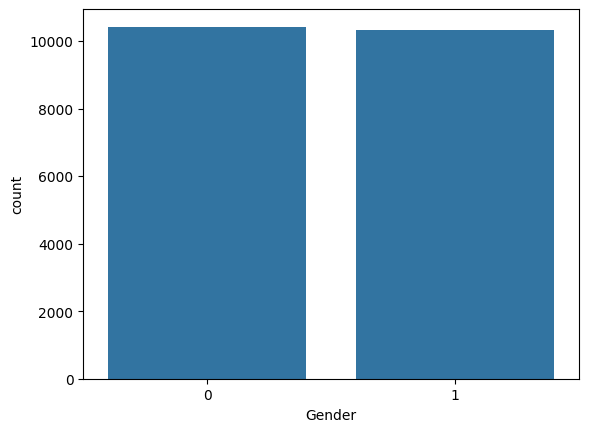

In [69]:
sns.countplot(x=df["Gender"])

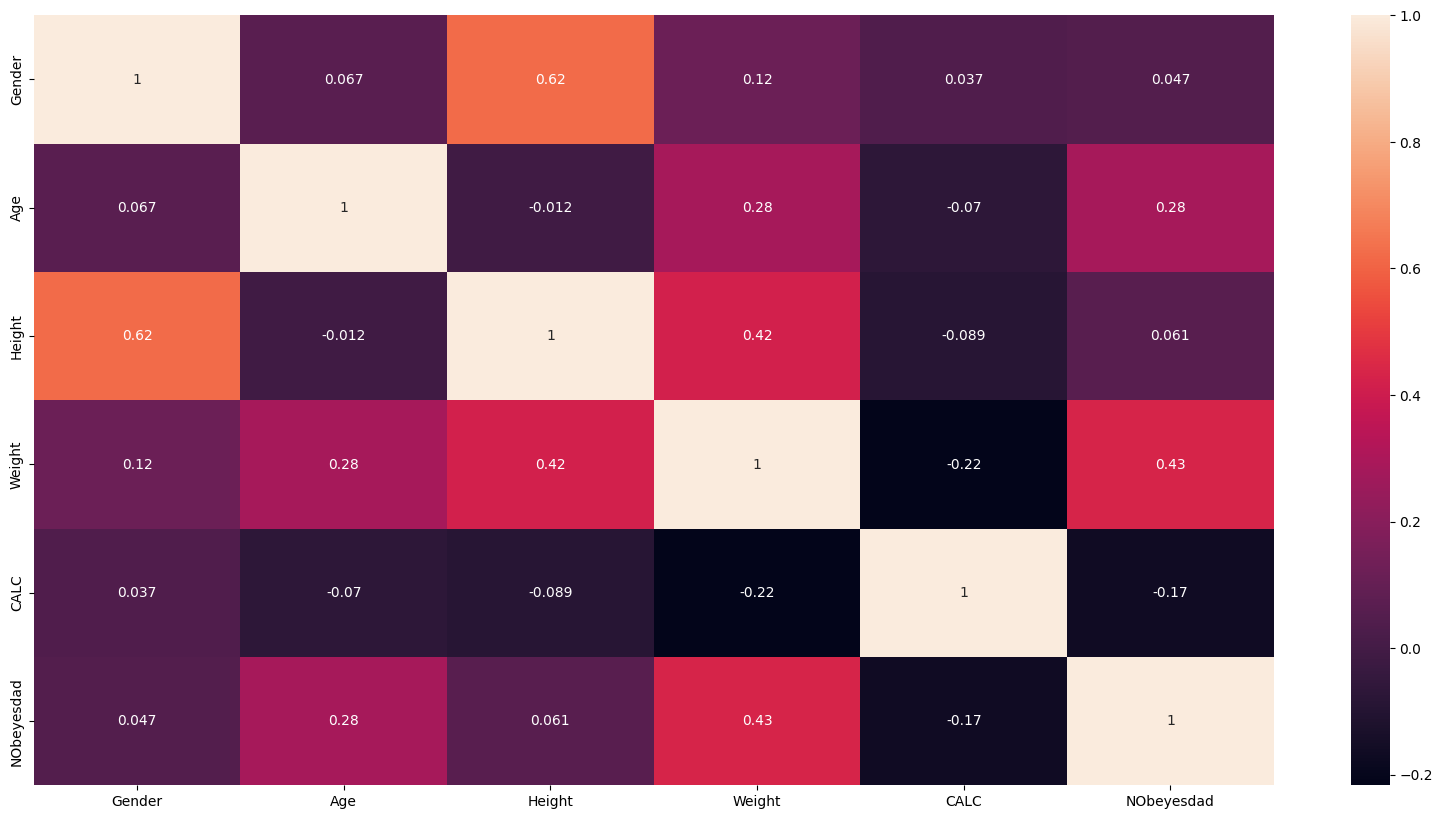

In [70]:
matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True)
plt.show()

# Model Tensorflow

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

In [27]:
X

,Gender,Age,Height,Weight,CALC
0,1,24.443011,1.699998,81.669950,1
1,0,18.000000,1.560000,57.000000,2
2,0,18.000000,1.711460,50.165754,2
3,0,20.952737,1.710730,131.274851,1
4,1,31.641081,1.914186,93.798055,1
...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1
20754,1,18.000000,1.710000,50.000000,1
20755,1,20.101026,1.819557,105.580491,2
20756,1,33.852953,1.700000,83.520113,2


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
x_train

,Gender,Age,Height,Weight,CALC
1846,1,32.000000,1.750000,120.000000,1
14225,0,19.783234,1.822573,133.952675,1
9438,1,21.793724,1.776989,89.993812,1
12459,0,21.000000,1.670000,66.000000,1
12189,0,25.470652,1.628205,107.378702,1
...,...,...,...,...,...
11284,0,18.000000,1.722461,80.442775,2
11964,1,22.000000,1.750000,95.000000,1
5390,1,21.000000,1.620000,68.000000,1
860,0,26.000000,1.650125,111.939671,1


In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "model_checkpoint.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


In [85]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_true_classes, y_test_pred_classes))
print("Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes))

195/195 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 690   60    1    1    0    2    1]
 [  75  744    2    0    0   70   16]
 [   2    3  714   42    5   16   76]
 [   0    0   37  966    0    0    2]
 [   1    0    1    2 1203    0    0]
 [   2   79   13    5    0  497  137]
 [   0   19   68   10    0   78  588]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       755
           1       0.82      0.82      0.82       907
           2       0.85      0.83      0.84       858
           3       0.94      0.96      0.95      1005
           4       1.00      1.00      1.00      1207
           5       0.75      0.68      0.71       733
           6       0.72      0.77      0.74       763

    accuracy                           0.87      6228
   macro avg       0.85      0.85      0.85      6228
weighted avg       0.87      0.87      0.87      6228



In [86]:
def calculate_bmr(gender, age, body_height, body_weight, activity):
    body_height = body_height*100
    if gender == 0:  # Perempuan
        bmr = 447.593 + (9.247 * body_weight) + (3.098 * body_height) - (4.330 * age)
    else:  # Laki-laki
        bmr = 88.362 + (13.397 * body_weight) + (4.799 * body_height) - (5.677 * age)

    if activity == 1:  # Perempuan
        tdee = bmr * 1.465
    elif activity == 2:  # Laki-laki
        tdee = bmr * 1.2
    else:
        tdee = bmr * 1.8125

    return tdee

In [37]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

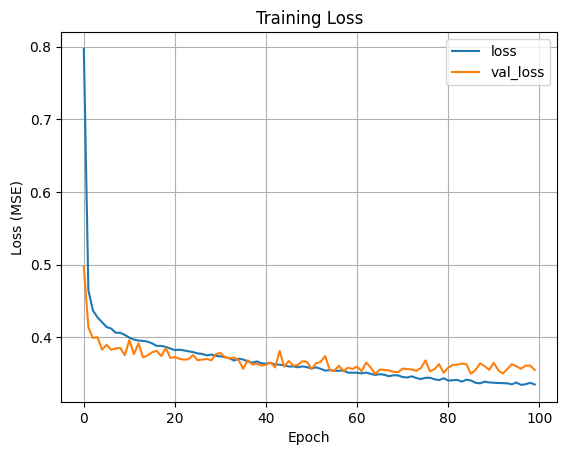

In [38]:
plot_loss(history)


In [87]:
import json
obesity_mapping = {
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II"
}

def predict_all(model, scaler, gender, age, body_height, body_weight, calc):
    user_data = np.array([[gender, age, body_height, body_weight, calc]])
    user_data = scaler.transform(user_data)  # Apply the same scaling
    predicted_obesity = model.predict(user_data)
    predicted_obesity = np.argmax(predicted_obesity, axis=1)[0]
    predicted_calories  = calculate_bmr(gender, age, body_height, body_weight, activity)

    return {
        "predicted_calories": int(predicted_calories),
        "predicted_obesity": int(predicted_obesity),
        "obesity_label": obesity_mapping[int(predicted_obesity)]
    }


# Example usage
age = 24
body_weight = 45
body_height = 1.6 #input (m)
gender = 1
activity = 1

prediction = predict_all(model, scaler, gender, age, body_height, body_weight, activity)
print(json.dumps(prediction, indent=4))

1/1 [==============================] - 0s 22ms/step
{
    "predicted_calories": 1937,
    "predicted_obesity": 1,
    "obesity_label": "Normal_Weight"
}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Flask

In [88]:
model.save_weights('predict_obesity_calories.h5')

In [104]:
from flask import Flask, jsonify, request
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize Flask app
# app = Flask(__name__)

# Load the model
model.load_weights("/content/predict_obesity_calories.h5")
# Load the scaler
# Assuming the scaler is saved as 'scaler.pkl' using joblib
# scaler = joblib.load('/content/scaler.pkl')

# Function to calculate BMR (Basal Metabolic Rate)
def calculate_bmr(gender, age, body_height, body_weight, activity):
    body_height_cm = body_height * 100
    if gender == 0:  # Female
        bmr = 447.593 + (9.247 * body_weight) + (3.098 * body_height_cm) - (4.330 * age)
    else:  # Male
        bmr = 88.362 + (13.397 * body_weight) + (4.799 * body_height_cm) - (5.677 * age)

    if activity == 1:
        tdee = bmr * 1.465
    elif activity == 2:
        tdee = bmr * 1.2
    else:
        tdee = bmr * 1.8125

    return tdee

# Obesity level mapping
obesity_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# @app.route('/classify', methods=['POST'])
def classify():
    # try:
    # content = request.json
    age = 19
    body_weight = 30
    body_height = 1.6 #input (m)
    gender = 1
    activity_level = 1

    calories = calculate_bmr(gender, age, body_height, body_weight, activity_level)

    # Prepare the input data for the model
    user_data = np.array([[gender, age, body_height, body_weight, activity_level]])
    user_data = scaler.transform(user_data)

    predictions =  model.predict(user_data)
    predicted_weight_status_index = np.argmax(predictions)
    predicted_weight_status = int(predicted_weight_status_index)

    result = {
        "predicted_calories": int(calories),
        "predicted_obesity": int(predicted_weight_status),
        "obesity_label": obesity_mapping[int(predicted_weight_status)],
        "user_data": user_data
    }

    return result

    # except Exception as e:
    #     return jsonify({'message': 'Error processing the request', 'details': str(e)}), 400

if __name__ == '__main__':
    # app.run(debug=True)
    print(classify())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 203ms/step
{'predicted_calories': 1685, 'predicted_obesity': 0, 'obesity_label': 'Insufficient_Weight', 'user_data': array([[ 1.00427618, -0.84923169, -1.14565616, -2.1942821 , -0.4750287 ]])}


# Model Gradient GradientBoostingClassifier

In [ ]:
# X = df.drop("NObeyesdad", axis=1)
# y = df["NObeyesdad"]

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.metrics import f1_score, confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split

# # g = GaussianNB()
# # b = BernoulliNB()
# # l = LogisticRegression()
# # d = DecisionTreeClassifier()
# # r = RandomForestClassifier()
# gb= GradientBoostingClassifier()
# # kn= KNeighborsClassifier()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# gb = GradientBoostingClassifier()
# gb.fit(X_train, y_train)

# y_test_pred = gb.predict(X_test)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred))


In [ ]:
# def pred_obesity(model, scaler, gender, age, body_weight, body_height, calc):
#     user_data = np.array([[gender, age, body_weight, body_height, calc]])
#     user_data = scaler.transform(user_data)  # Apply the same scaling
#     prediction = model.predict(user_data)
#     return prediction[0]

In [ ]:
# age = 21
# body_weight = 10
# body_height = 1.1
# gender = 1
# activity = 1

# predict_obesity = pred_obesity(gb, scaler, gender, age, body_weight, body_height, activity)
# print(f'Prediksi Obesity: {predict_obesity}')
